### KNN Classifier & Regressor

* Model building consists only of storing training datasets
* Algo finds the closest data point in training dataset - its nearest neighbor.

In [1]:
import mglearn

C:\Users\10671076\anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\10671076\anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X

In [2]:
import warnings
warnings.filterwarnings("ignore")

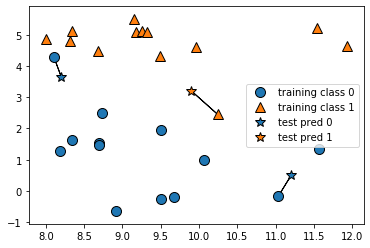

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

* When considering more than one neighbor, we use voting to assign a label.
* Assign a class that is more frequent, the majority class among the k-nearest neighbors.

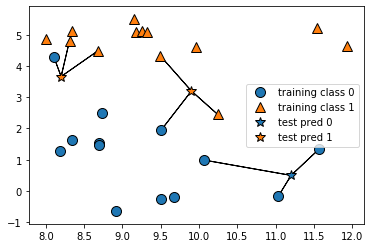

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

#### using sklearn : knnClassification

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X,y = mglearn.datasets.make_forge()

In [6]:
y.shape

(26,)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [8]:
X_train.shape

(19, 2)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3,metric='cosine')

In [10]:
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='cosine',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [11]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='cosine',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [12]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [13]:
clf.score(X_test,y_test)

0.8571428571428571

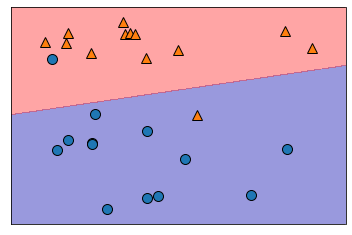

In [14]:
mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,alpha=0.4)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

#### Visualizations for k = 1 , 3, 9

In [15]:
import matplotlib.pyplot as plt
import numpy as np

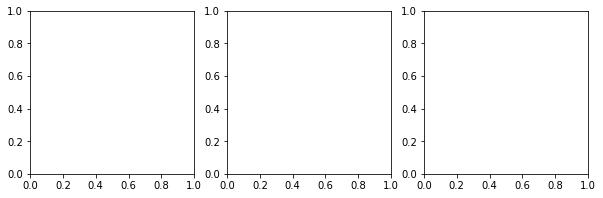

In [16]:
fig, axes = plt.subplots(1,3, figsize=(10,3))

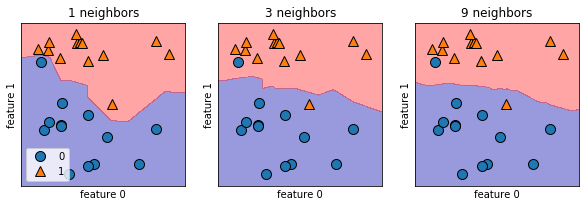

In [17]:
fig, axes = plt.subplots(1,3, figsize=(10,3))
for n_neighbors, ax in zip([1,3,9], axes):
    clff = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clff, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{} neighbors".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

* Few neighbors -> High model complexity
* More neighbors -> Low model complexity

In [18]:
from sklearn.datasets import load_breast_cancer

In [19]:
cancer = load_breast_cancer()

In [20]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [21]:
cancer.data.shape

(569, 30)

In [22]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [23]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

In [24]:
X_train.shape

(426, 30)

In [43]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

In [44]:
for vai in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=vai)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

In [45]:
training_accuracy

[1.0,
 0.9765258215962441,
 0.9577464788732394,
 0.9553990610328639,
 0.9483568075117371,
 0.9460093896713615,
 0.9436619718309859,
 0.9413145539906104,
 0.9342723004694836,
 0.9389671361502347]

In [46]:
test_accuracy

[0.9020979020979021,
 0.8881118881118881,
 0.9230769230769231,
 0.9230769230769231,
 0.9230769230769231,
 0.9370629370629371,
 0.9300699300699301,
 0.9300699300699301,
 0.916083916083916,
 0.916083916083916]

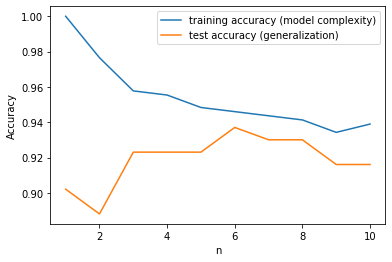

In [49]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy (model complexity)")

plt.plot(neighbors_settings, test_accuracy, label="test accuracy (generalization)")

plt.ylabel("Accuracy")
plt.xlabel("n")
plt.legend()

* For training set, single nearest neighbor --> prediction perfect, high accuracy
                    more neighbors --> model becomes simpler & training accuracy drops.
* For test set, accuracy (single nearest neighbor) <  accuracy (more neighbors)

Best accuracy, k = somewhere in middle (5 or 6)

### knn regression

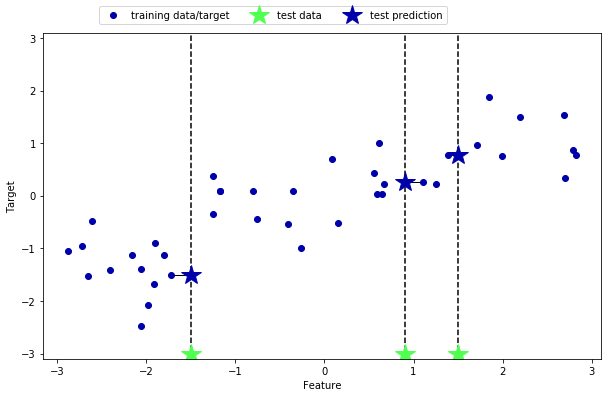

In [50]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

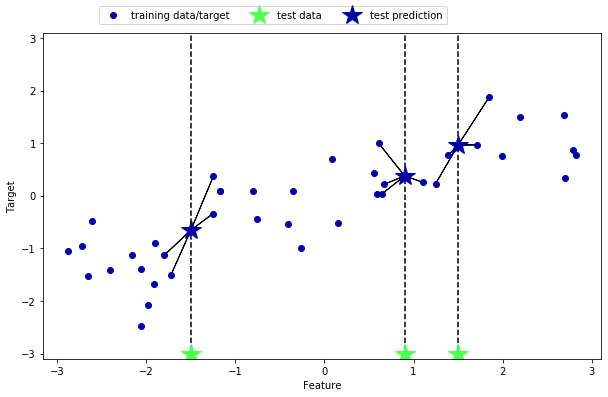

In [55]:
mglearn.plots.plot_knn_regression(n_neighbors=4)

In [56]:
from sklearn.neighbors import KNeighborsRegressor

In [62]:
X, y  = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [63]:
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [64]:
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

R^2 score : 
* coefficient of determination; 
* measure of goodness of prediction for regression model; 
* value : [0,1]

In [66]:
print("Test set R^2 : {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2 : 0.83


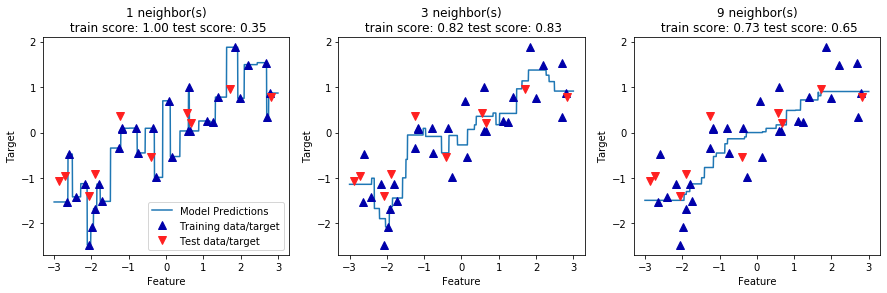

In [67]:
fig, axes = plt.subplots(1,3, figsize=(15,4))
line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, "^", c = mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, "v", c = mglearn.cm2(1), markersize=8)
    
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test,y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model Predictions", "Training data/target", "Test data/target"], loc="best")

Strengths of knn:
* easy to understand
* reasonable output without much adjustments

Weakness:
* with large training set, prediction can be slow
* low performance with many features, performs badly with datasets where most features are 0 most of the time